In [98]:
import numpy as np
import math

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [99]:
n = 50
L =16    
h =L/n
tau = h*h/(2*np.pi)
theta = 0.5 #(0,1)
j = complex(0,1)
#x = np.linspace(0,L,n)[:-1]

x = np.array([i*h for i in range(n)])
#мю 
mu = np.array([2*math.pi*i/(L) for i in range(int(-n/2),int(n/2))])[1:]

q = 1
r = complex(tau/(h*h),0)


k=2
omega = 1
muc = 0
nu = 1
A=1
v = 1
x0 = 0




def solution(x,t):
    
    return np.sqrt(nu*2)*A*np.exp(j*(k*x - omega*t - theta))/np.sqrt(-muc + np.sqrt(complex(muc**2 - nu,0))*np.cosh(2*np.sqrt(nu*(x - v*t - x0))))
# начальное условие
U0= 0.5*(1+np.cos(3.14*x/8))
# график функции
U = [U0]
# после преобразования фурье
U1 = [[0]*mu.shape[0]]


S = [[complex(-2,0),complex(1,0)]+[complex(0,0)]*(n-3)+[complex(1,0)]]
for i in range(1,n-1):
    nS = [complex(0,0)]*n
    nS[i] = complex(-2,0)
    nS[i-1] = complex(1,0)
    nS[i+1] = complex(1,0)
    S.append(nS)
S.append([complex(1,0)]+[complex(0,0)]*(n-3)+[complex(1,0),complex(-2,0)])
S = np.array(S)



In [100]:
def N(u):
    return q*np.abs(u)*np.abs(u)


In [101]:
def nextStepLinear(_U):
    _V = np.exp(j*tau*N(_U))*_U
    return  np.linalg.solve(np.eye(n) - j*r*theta*S,np.dot(np.eye(n) + j*r*(1-theta)*S,_V.transpose()))

In [102]:
def furierTransform(W):
    a = np.array([])
    for m in mu:
        a = np.append(a,np.array([np.sum(W*np.exp(-j*m*x))*h/L]))
    return a
def inverseFurierTransform(W):
    a = np.array([])
    for xj in x:
        a = np.append(a, np.sum(W*np.exp(j*mu*xj)))
    
    return a


In [103]:

def nextStep(_U):
    _V = np.exp(j*tau*N(_U))*_U
    _V_ = furierTransform(_V)
    _U_ = np.exp(-j*mu*mu*tau)*_V_
    U1.append(_U_)
    _Un = inverseFurierTransform(_U_)
    return _Un

t = np.array(0)
for t_ in range(1, 800):
    t = np.append(t,tau*t_)
    U.append(nextStep(U[-1]))
    

U = np.array(U)


In [104]:
# a = 1
# b = q
# alpha =1
# L_tilda = alpha*mu**3- a*mu**2
# def fft(W):
#     a = np.array([])
#     for m in mu:
#         a = np.append(a,np.array([np.sum(W*np.exp(-j*m*x))/n]))
#     return a
# def ifft(W):
#     a = np.array([])
#     for xj in x:
#         a = np.append(a, np.sum(W*np.exp(j*mu*xj)))
    
#     return a
# def Lu(u):

#     return ifft(np.exp(j*L_tilda*tau)*(fft(u)))
# def Nu(u):
#      return np.exp(j*tau*b*np.abs(u)**2)*u
# t = np.array(0)
# U=[U0]

# for t_ in range(1, 800):
#     t = np.append(t,tau*t_)
#     U.append(Lu(Nu(U[-1])))
    

# U = np.array(U)
# fig = plt.figure()
# #ax = fig.add_subplot(111, projection='3d')
# plt.plot(x,solution(x,0))
# plt.show()

In [105]:
def plot_surface(ax, x, y, z, title):
    ax.clear()
    ax.set_title(title)
    ax.plot_surface(x, y, z, cmap='viridis', edgecolor='k', linewidth=0.5)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(45,135)

# T, X = np.meshgrid(t,x)
# plot_surface(ax, T, X, np.real(solution(X,T)), title="График функции")

# # Закон сохранения

# print((np.sum(np.abs(solution(X,T))**2, axis = 0)))
# plt.show()

(800,) (800,)


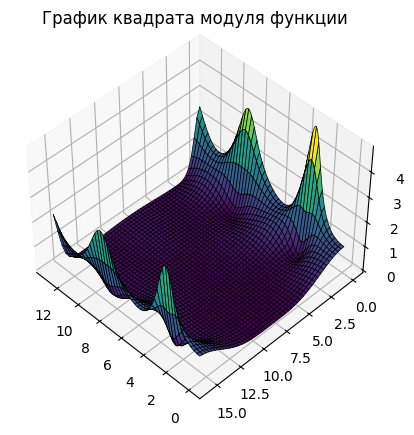

In [106]:



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45,135)

T, X = np.meshgrid(t,x)
plot_surface(ax, T.transpose(), X.transpose(), np.abs(U)**2, title="График квадрата модуля функции")

# Закон сохранения

print((np.sum(np.abs(U)*np.abs(U), axis = 1)).shape,t.shape)
plt.show()

(800,) (800,)


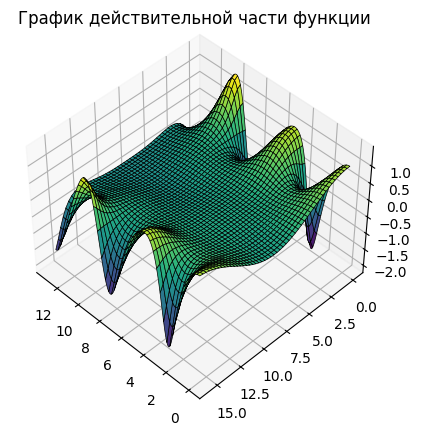

In [107]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45,135)

T, X = np.meshgrid(t,x)
plot_surface(ax, T.transpose(), X.transpose(), np.real(U), title="График действительной части функции")

# Закон сохранения

print((np.sum(np.abs(U)*np.abs(U), axis = 1)).shape,t.shape)
plt.show()

[18.73418549 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549
 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549
 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549
 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549
 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549
 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549
 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549
 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549
 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549
 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549
 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549
 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549
 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549 18.73418549
 18.73418549 18.73418549 18.73418549 18.73418549 18

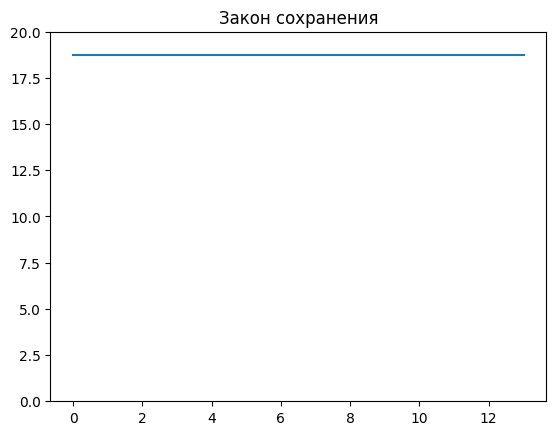

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111)
t = np.array(0)
for t_ in range(1, 800):
    t = np.append(t,tau*t_)
    
    

T, X = np.meshgrid(t,x)
ax.clear()
ax.set_title("Закон сохранения")
ax.set_ylim(0.,20)
print(np.sum(np.abs(U)*np.abs(U),axis = 1))
ax.plot(t, np.sum(np.abs(U)*np.abs(U), axis = 1))
# Закон сохранения


plt.show()


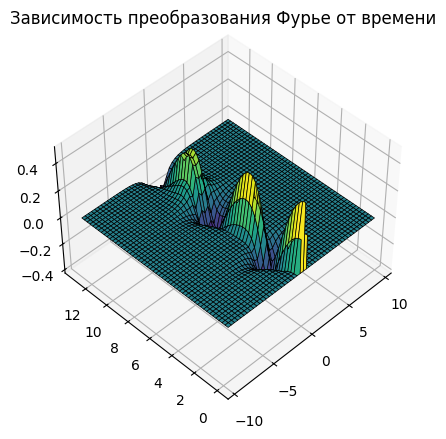

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45,-135)
MU, T1 = np.meshgrid(t,mu)


plot_surface(ax, T1.transpose(), MU.transpose(), np.real(np.array(U1)), title="Зависимость преобразования Фурье от времени")